#BLD librerias preentrenadas
------------

##Algoritmo con libreria DeepFace



In [ ]:
#intalar la libreria que se va a usar deep face library
!pip install deepface

In [ ]:
#librerias que se usan
from deepface import  DeepFace
import cv2
import matplotlib.pyplot as plt
import pandas as pd

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
#para que se pueda abrir en colab
from google.colab.patches import cv2_imshow
import numpy as np


In [ ]:
#libreria necesaria para que abra en colab
from deepface import DeepFace

emotion_model = DeepFace.build_model('Emotion')

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 60.9MB/s]


In [ ]:
#libreria para redimencionar el video
!apt-get install ffmpeg -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
#para medir el tiempo de ejucion
import time

In [ ]:
#El siguiente codigo nos ayuda a  hacer un video mas pequeño en cuanto a la dimension
!ffmpeg -i '/content/drive/MyDrive/detector_emociones/exp_origi.mp4' -vf "scale=140:200" -c:a copy exp_140X200.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
#Algoritmo
#aqui se pone la ruta del video
cap_tres = cv2.VideoCapture('/content/drive/MyDrive/detector_emociones/3minutos100X160.mp4')
current_time = 0.0
results_df_tres = pd.DataFrame(columns=["Tiempo", "Emoción"])

start_time = time.time()  # Iniciar el temporizador

while cap_tres.isOpened():
    ret, frame = cap_tres.read()

    if not ret:
        break

    # Obtén el tiempo actual del video
    current_time = cap_tres.get(cv2.CAP_PROP_POS_MSEC) / 1000.0
    # Imprime el tiempo actual en la consola
    # print("Tiempo actual:", current_time)

    try:
        # Realiza operaciones en el cuadro (frame) aquí
        emotion = DeepFace.analyze(frame, actions=['emotion'])
        dominant_emotion = emotion[0]['dominant_emotion']
        # print(emotion[0]['dominant_emotion'])

        # Guardar los resultados en el DataFrame
        results_df_tres = results_df_tres.append({"Tiempo": current_time, "Emoción": dominant_emotion},
                                                 ignore_index=True)

        # Muestra el cuadro resultante
        # cv2_imshow(frame)

    except Exception as e:
        print("Error al analizar el frame:", e)

        # Guardar "Sin Cara" en el DataFrame
        results_df_tres = results_df_tres.append({"Tiempo": current_time, "Emoción": "Sin Cara"},
                                                 ignore_index=True)
        continue  # Continuar con el siguiente frame sin guardar resultados

    # Espera por la tecla 'q' para salir del bucle
    if cv2.waitKey(1) == ord('q'):
        break

end_time = time.time()  # Detener el temporizador

execution_time = end_time - start_time  # Calcular el tiempo de ejecución

print("Tiempo de ejecución:", execution_time)

# Actualizar el tiempo actual en el DataFrame después del último frame analizado
results_df_tres["Tiempo"] = results_df_tres["Tiempo"].fillna(current_time)

# Liberar los recursos
cap_tres.release()

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Pl

Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Pl

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.22it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Pl

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.95it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Pl

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.57it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Pl

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.25it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Pl

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error al analizar el frame: Face could not be detected. Pl

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]


Error al analizar el frame: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]

Tiempo de ejecución: 692.8067035675049


In [ ]:
execution_time = (end_time - start_time) / 60.0  # Calcular el tiempo de ejecución en minutos

print("Tiempo de ejecución:", execution_time, "minutos")

Tiempo de ejecución: 11.546778392791747 minutos


In [ ]:
#Veamos el dataframe generado
results_df_tres

,Tiempo,Emoción
0,0.000000,neutral
1,0.033333,neutral
2,0.066667,neutral
3,0.100000,neutral
4,0.133333,neutral
...,...,...
5579,185.966667,neutral
5580,186.000000,neutral
5581,186.033333,neutral
5582,186.066667,neutral


In [ ]:
#Para ver la cantidad de emociones
results_df_tres['Emoción'].value_counts()

neutral     4220
happy        796
fear         210
Sin Cara     188
sad          129
angry         24
surprise      17
Name: Emoción, dtype: int64

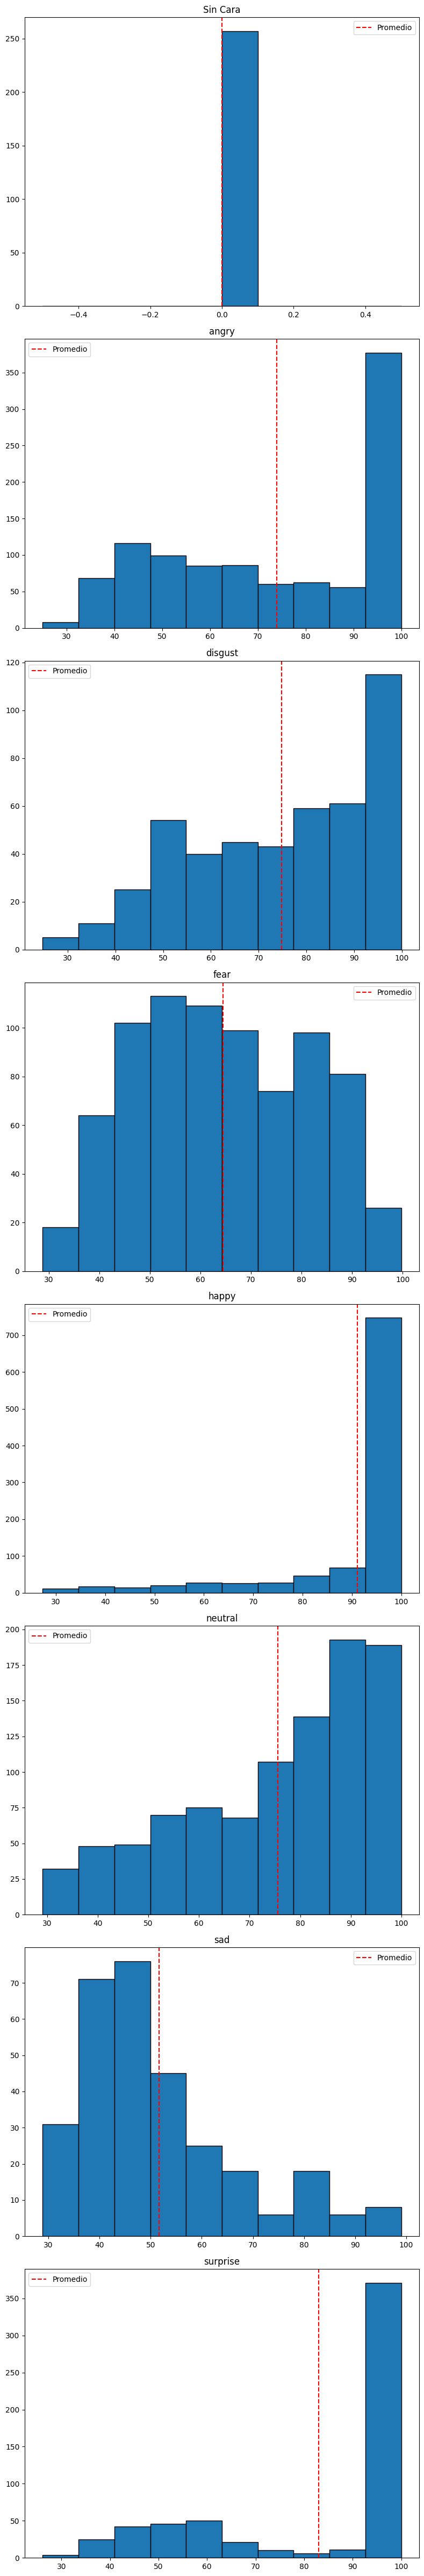

In [ ]:
# Crear un diccionario para almacenar los histogramas de cada emoción
emotion_histograms = {}

# Agrupar por "Emoción"
grouped_df = results_df_tres.groupby("Emoción")

# Iterar a través de cada grupo y crear el histograma
for emotion, group in grouped_df:
    emotion_histograms[emotion] = group["Porcentaje Dominante"]

# Plotear los histogramas
fig, axs = plt.subplots(len(emotion_histograms), figsize=(8, 6*len(emotion_histograms)))

if len(emotion_histograms) == 1:
    axs.hist(emotion_histograms[emotion], bins=10, edgecolor='black')
    axs.axvline(x=emotion_histograms[emotion].mean(), color='red', linestyle='--', label='Promedio')
    axs.set_title(emotion)
    axs.legend()
else:
    for i, (emotion, data) in enumerate(emotion_histograms.items()):
        axs[i].hist(data, bins=10, edgecolor='black')
        axs[i].axvline(x=data.mean(), color='red', linestyle='--', label='Promedio')
        axs[i].set_title(emotion)
        axs[i].legend()

plt.tight_layout()
plt.show()

## Algoritmo con libreria FER

In [ ]:
#Instalar libreria FER
!pip install fer

In [ ]:
# Liberias utilizadas para el algoritmo
import time
import cv2
from fer import FER
import pandas as pd
import numpy as np

video_file = "emociones7.mp4"
target_fps = 26  # Tasa de cuadros por segundo objetivo
output_csv = "resultados.csv"  # Ruta del archivo CSV de salida (resultados)

face_detector = FER(mtcnn=True)

# Leer el video con OpenCV
video_capture = cv2.VideoCapture(video_file)

# Obtener la resolución original del video
original_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
original_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Parametros para cambiar la resolucion
new_width = original_width
new_height = original_height

start_time = time.time()  # Iniciar contador de tiempo

# Obtener la tasa de cuadros por segundo (FPS) del video
video_fps = video_capture.get(cv2.CAP_PROP_FPS)

# Calcular el paso de fotogramas para obtener aproximadamente 20 fotogramas por segundo
frame_step = max(1, int(video_fps / target_fps))

# Procesar los fotogramas del video
processing_data = []
frame_counter = 0

while True:
    # Leer el siguiente fotograma del video
    ret, frame = video_capture.read()

    # Verificar si se alcanzó el final del video
    if not ret:
        break

    # Redimensionar el fotograma a la nueva resolución reducida
    resized_frame = cv2.resize(frame, (new_width, new_height))

    # Analizar el fotograma redimensionado con FER
    if frame_counter % frame_step == 0:
        processed_frame = face_detector.detect_emotions(resized_frame)
        processing_data.append(processed_frame)

    frame_counter += 1

# Liberar el objeto VideoCapture y finalizar el contador de tiempo
video_capture.release()
end_time = time.time()
execution_time = end_time - start_time

# Crear un DataFrame con los resultados
df = pd.DataFrame(processing_data)

# Guardar los resultados en un archivo CSV
df.to_csv(output_csv, index=False)

print(f"Tiempo de ejecución: {execution_time:.2f} segundos")
print(f"Resultados guardados en: {output_csv}")

In [ ]:
# Leer el archivo generado anteriormente
df = pd.read_csv('resultados.csv')

# Definir una función para sumar las emociones dominantes
def sumar_emociones_dominantes(row):
    emociones = eval(row)
    emocion_dominante = max(emociones['emotions'], key=emociones['emotions'].get)
    emociones_dominantes[emocion_dominante] += 1

# Crear un diccionario para almacenar el recuento de emociones dominantes
emociones_dominantes = {
    'angry': 0,
    'disgust': 0,
    'fear': 0,
    'happy': 0,
    'neutral': 0,
    'sad': 0,
    'surprise': 0
}

# Aplicar la función a la columna "0" del DataFrame para sumar las emociones dominantes
df['0'].apply(sumar_emociones_dominantes)

# Imprimir los resultados de las emociones dominantes sumadas
for emocion, count in emociones_dominantes.items():
    print(f"{emocion}: {count}")

In [ ]:
# Este codigo permite limpiar el DataFrame obtenido con el modelo

import pandas as pd
import re
df = pd.read_csv('resultados.csv')

#cambiamos la columna 0 para pasar el tipo de dato a str
df["0"] = df["0"].astype(str)

# Aplicamos la función re.sub para eliminar [], (), "", '', {} y espacios, y reemplazar ':' por ','
df["0"] = df["0"].apply(lambda x: re.sub(r'[()\[\]{}\'"\s]', '', str(x)).replace(':', ','))

# Dividimos la columna "0" en varias columnas usando la coma como separador
df = df["0"].str.split(',', expand=True)

# Generamos nombres de columna automáticamente
num_columnas = df.shape[1]
nombres_columnas = [f"Columna_{i+1}" for i in range(num_columnas)]

# Asignamos los nombres de columna al DataFrame
df.columns = nombres_columnas

# Conservamos las columnas utiles
df = df[['Columna_7','Columna_8','Columna_9','Columna_10','Columna_11','Columna_12','Columna_13','Columna_14','Columna_15', 'Columna_16', 'Columna_17', 'Columna_18', 'Columna_19', 'Columna_20']]
df_copy = df.copy()

nuevos_nombre = {
    'Columna_8' : 'angry',
    'Columna_10' : 'disgust',
    'Columna_12' : 'fear',
    'Columna_14' : 'happy',
    'Columna_16' : 'sad',
    'Columna_18' : 'surprise',
    'Columna_20' : 'neutral'
}

# Renombramos las columnas
df_copy.rename(columns = nuevos_nombre, inplace= True)
df_copy = df_copy[['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]

# Eliminamos los indices
df_copy.to_csv('probabilidades_limpio.csv')
df2 = pd.read_csv('probabilidades_limpio.csv')
df2.to_csv('df2.csv', index=False)
df2 = pd.read_csv('df2.csv')

# Eliminamos la columna 0
df2 = df2.drop(df2.columns[0], axis=1)

df2.to_csv('df3.csv')

In [ ]:
# Este codigo permite ver el conteo de una emocion agrupados por la probabilidad del modelo de acertar en la prediccion.

df3 = pd.read_csv('df3.csv')

# Lista de emociones disponibles
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Función para obtener la emoción dominante en cada fila
def get_dominant_emotion(row):
    num_values = row.astype(float)  # Convertir los valores a números
    return emotions[num_values.values.argmax()]

# Encontrar la emoción dominante en cada fila
df3['dominant_emotion'] = df3.apply(get_dominant_emotion, axis=1)

# Resultado: DataFrame df3 con la columna 'dominant_emotion'
df3 = df3.copy()

nombre_columna_a_eliminar = df3.columns[0]

# Eliminar la primera columna utilizando el nombre obtenido
df3.drop(columns=nombre_columna_a_eliminar, inplace=True)

df3['probabilidad_max'] = df3.max(axis=1)

# Crear la columna 'emocion_correspondiente' con la emoción correspondiente a la probabilidad más alta
df3['emocion_correspondiente'] = df3.idxmax(axis=1)

df_angry = df3[df3['emocion_correspondiente'] == 'angry']

# Crear los intervalos del eje x del 0 al 1 en intervalos de 0.1
intervalos = [i * 0.1 for i in range(11)]

# Calcular el recuento de ocurrencias en cada intervalo de la columna 'probabilidad_max' en el rango del intervalo actual
recuento_emocion_angry = [
    df_angry[
        (df_angry['probabilidad_max'] >= i) & (df_angry['probabilidad_max'] < i + 0.1)
    ].shape[0]
    for i in intervalos
]

# Crear el gráfico de barras
plt.bar(intervalos, recuento_emocion_angry, width=0.1)

# Etiquetas y título del gráfico
plt.xlabel('probabilidades')
plt.ylabel('Recuento')
plt.title('Recuento de emociones "angry"')
plt.axvline(x=0.5, color='red', linestyle='--', label='x=0.5')
plt.savefig('angry.png', dpi=300)
plt.show()